In [1]:
pip install medmnist

Note: you may need to restart the kernel to use updated packages.


In [2]:
from medmnist import PneumoniaMNIST

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
train_dataset = PneumoniaMNIST(split="train", download=True)
validation_dataset = PneumoniaMNIST(split="val", download=True)
test_dataset = PneumoniaMNIST(split="test", download=True)

In [4]:
train_dataset


Dataset PneumoniaMNIST of size 28 (pneumoniamnist)
    Number of datapoints: 4708
    Root location: C:\Users\ianmc\.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0

In [5]:
type(train_dataset)

medmnist.dataset.PneumoniaMNIST

In [6]:
img, label = train_dataset[0]
print(f"Type of image: {type(img)}")
# print(f"Shape of image: {img.shape}")

Type of image: <class 'PIL.Image.Image'>


In [7]:
# based on Windsurf prompt: "how to convert PIL.Image.Image to a numpy array"

# Get a sample image from the dataset
img, label = train_dataset[0]  # Get first sample

x_train = np.array(img)

print(f"Shape of numpy array: {x_train.shape}")

Shape of numpy array: (28, 28)


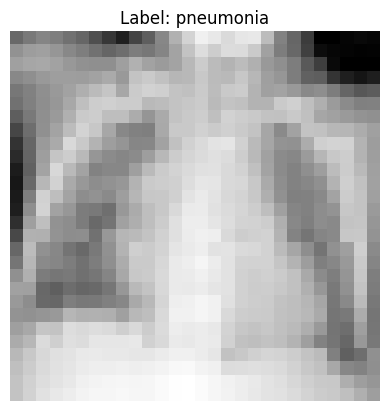

Pixel values:
[ 92 108 117 111 101  90  70  49  28  60  83 119 156 186 211 204 192 203
 204 166 115  90  53   0   0   5   8   6]


In [8]:
# based on Windsurf prompt: "how to plot the first sample image from train_dataset"

# Get the first sample
img_tensor, label = train_dataset[0]

# Convert tensor to numpy array
img_array = np.array(img_tensor)

# Plot the image
plt.imshow(img_array, cmap='gray')  # Use cmap='gray' for grayscale images
plt.title(f"Label: {'pneumonia' if label.item() == 1 else 'normal'}")
plt.axis('off')  # Hide axis
plt.show()

# If you want to see the raw pixel values
print("Pixel values:")
print(img_array[0])

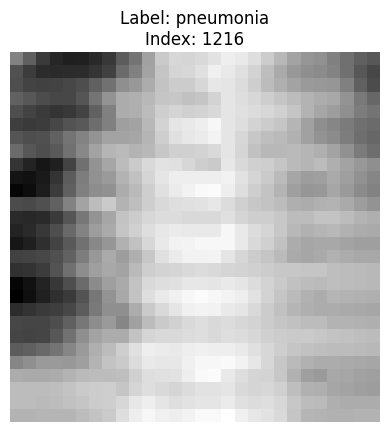

Image shape: (28, 28)
Label (0=normal, 1=pneumonia): 1


In [9]:
# based on Windsurf prompt: "how to plot a random image from train_dataset"

# Get a random index
random_idx = random.randint(0, len(train_dataset) - 1)

# Get the random sample
img_tensor, label = train_dataset[random_idx]

# Convert tensor to numpy array
img_array = np.array(img_tensor)

# Plot the image
plt.imshow(img_array, cmap='gray')
plt.title(f"Label: {'pneumonia' if label.item() == 1 else 'normal'}\nIndex: {random_idx}")
plt.axis('off')
plt.show()

# Print additional info about the sample
print(f"Image shape: {img_array.shape}")
print(f"Label (0=normal, 1=pneumonia): {label.item()}")

In [10]:
train_dataset

Dataset PneumoniaMNIST of size 28 (pneumoniamnist)
    Number of datapoints: 4708
    Root location: C:\Users\ianmc\.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0

In [11]:
# based on Windsurf prompt: "how to get a numpy ndarray of x_train images and y_train labels from train_dataset of type medmnist.dataset.PneumoniaMNIST"

# Initialize lists to store images and labels
images = []
labels = []

# Loop through the dataset
for img_tensor, label in train_dataset:
    # Convert tensor to numpy array and append
    images.append(np.array(img_tensor))
    labels.append(label.item())  # Convert tensor to scalar

# Convert lists to numpy arrays
x_train = np.stack(images)  # Stack images into a single array
y_train = np.array(labels)  # Convert labels list to array

x_train = np.expand_dims(x_train, axis=-1)

# Check shapes
print(f"x_train shape: {x_train.shape}")  # Should be (4708, 28, 28, 1)
print(f"y_train shape: {y_train.shape}")  # Should be (4708,)

# TODO: If you want to flatten the images for machine learning
# x_train_flattened = x_train.reshape(x_train.shape[0], -1)  # Shape will be (4708, 784)

x_train shape: (4708, 28, 28, 1)
y_train shape: (4708,)


In [12]:
# Initialize lists to store images and labels
images = []
labels = []

# Loop through the dataset
for img_tensor, label in validation_dataset:
    # Convert tensor to numpy array and append
    images.append(np.array(img_tensor))
    labels.append(label.item())  # Convert tensor to scalar

# Convert lists to numpy arrays
x_validation = np.stack(images)  # Stack images into a single array
y_validation = np.array(labels)  # Convert labels list to array

x_validation = np.expand_dims(x_validation, axis=-1)

# Check shapes
print(f"x_validation shape: {x_validation.shape}")  # Should be (4708, 28, 28, 1)
print(f"y_validation shape: {y_validation.shape}")  # Should be (4708,)

x_validation shape: (524, 28, 28, 1)
y_validation shape: (524,)

y_validation shape: (524,)


In [13]:
images = []
labels = []
 
# Loop through the dataset
for img_tensor, label in test_dataset:
    # Convert tensor to numpy array and append
    images.append(np.array(img_tensor))
    labels.append(label.item())  # Convert tensor to scalar
 
# Convert lists to numpy arrays
x_test = np.stack(images)  # Stack images into a single array
y_test = np.array(labels)  # Convert labels list to array
 
x_test = np.expand_dims(x_test, axis=-1)

In [14]:
# Normalize image pixel values to [0, 1]
if x_train.max() > 1:
    x_train = x_train.astype(np.float32) / 255.0
    
if x_validation.max() > 1:
    x_validation = x_validation.astype(np.float32) / 255.0

if x_test.max() > 1:
    x_test = x_test.astype(np.float32) / 255.0

### Baseline implementation

Uses a dense neural network with 2 hidden layers of 8 neurons each, like from early DNN examples from class and like projects 2 and 3.

These choices led to a trainable parameter count of 6361, which is larger than the number of images in the training set (4708).

In [15]:
# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'), # TODO: Try with fewer hidden layers and neurons.
    Dense(1, activation='sigmoid')]) # sigmoid for binary classification.

# TODO: Consider trying BinaryFocalCrossentropy also: https://keras.io/api/losses/probabilistic_losses/#binaryfocalcrossentropy-class
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

model.summary()

c:\Users\ianmc\.virtualenvs\Pneumonia-Detection-ecOayFjV\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,361 (24.85 KB)

 Trainable params: 6,361 (24.85 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)


(4708, 28, 28, 1)
(4708,)
(524, 28, 28, 1)
(524,)


In [17]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation))

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7915 - loss: 0.4525 - val_accuracy: 0.8969 - val_loss: 0.2486
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7915 - loss: 0.4525 - val_accuracy: 0.8969 - val_loss: 0.2486
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.9068 - loss: 0.2338 - val_accuracy: 0.9389 - val_loss: 0.1867
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.9068 - loss: 0.2338 - val_accuracy: 0.9389 - val_loss: 0.1867
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.9221 - loss: 0.1955 - val_accuracy: 0.9504 - val_loss: 0.1646
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.9221 - loss: 0.1955 - val_accuracy: 0.9504 - val_loss: 0.1646
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9292 - loss: 0.1811 - val_accuracy: 0.9504 - val_loss: 0.1531
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9292 - loss: 0.1811 - val_accu

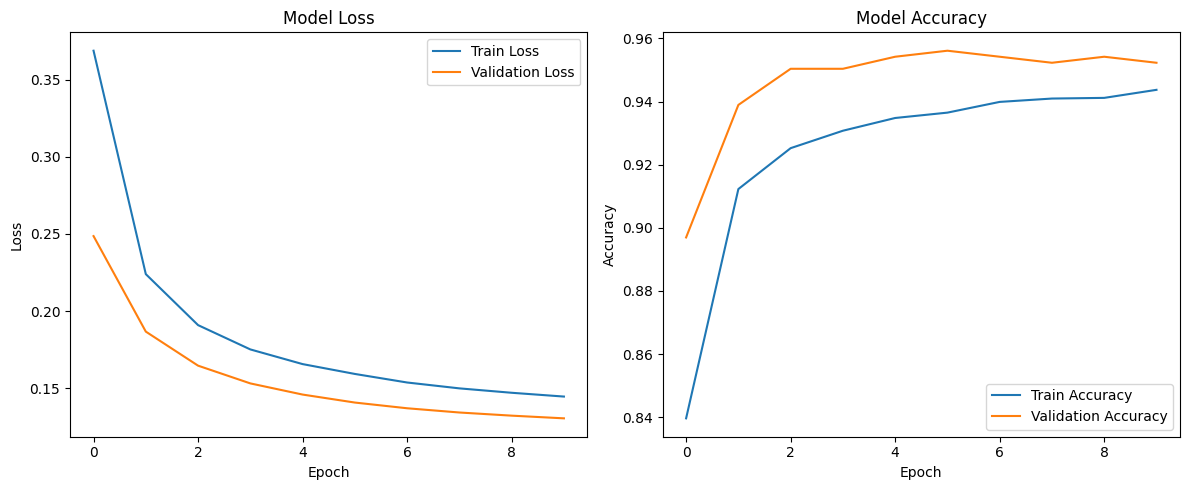

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Class distribution in y_train:
Class normal (label 0): 1214 samples
Class pneumonia (label 1): 3494 samples

Using pandas:
1    3494
0    1214
Name: count, dtype: int64
1    74.214104
0    25.785896
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


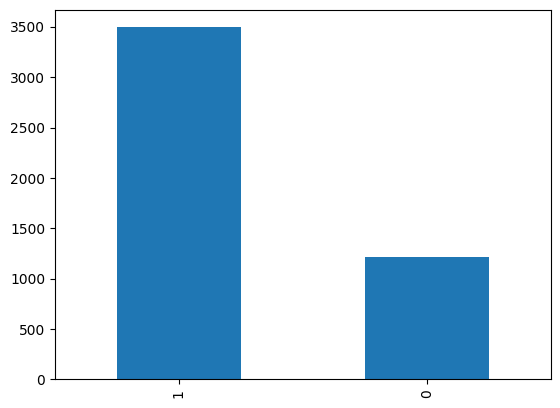

In [19]:
# Get unique values and their counts
unique_values, counts = np.unique(y_train, return_counts=True)

# Create a dictionary of counts
class_counts = dict(zip(unique_values, counts))

# Print the counts
print(f"Class distribution in y_train:")
for class_id, count in class_counts.items():
    class_name = 'normal' if class_id == 0 else 'pneumonia'
    print(f"Class {class_name} (label {class_id}): {count} samples")

# Alternative way using pandas
import pandas as pd
y_train_df = pd.Series(y_train)
print("\nUsing pandas:")
print(y_train_df.value_counts())
percentage_df = y_train_df.value_counts(normalize=True) * 100
print(percentage_df)
print(y_train_df.value_counts().plot(kind='bar'))


Class distribution in y_validation:
Class normal (label 0): 135 samples
Class pneumonia (label 1): 389 samples

Using pandas:
1    389
0    135
Name: count, dtype: int64
1    74.236641
0    25.763359
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


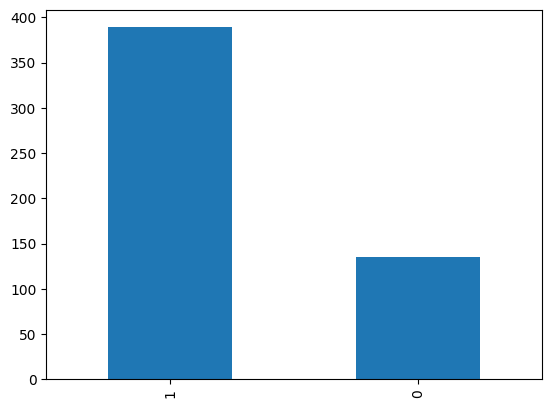

In [20]:
# Get unique values and their counts
unique_values, counts = np.unique(y_validation, return_counts=True)

# Create a dictionary of counts
class_counts = dict(zip(unique_values, counts))

# Print the counts
print(f"Class distribution in y_validation:")
for class_id, count in class_counts.items():
    class_name = 'normal' if class_id == 0 else 'pneumonia'
    print(f"Class {class_name} (label {class_id}): {count} samples")

# Alternative way using pandas
import pandas as pd
y_validation_df = pd.Series(y_validation)
print("\nUsing pandas:")
print(y_validation_df.value_counts())
percentage_df = y_validation_df.value_counts(normalize=True) * 100
print(percentage_df)
print(y_validation_df.value_counts().plot(kind='bar'))

In [21]:
# from Prof:
# Try CNN
# TODO: try classical machine learning such as random forest.
# try increasing the size of the testing dataset and decreasing the size of the training dataset.
# if we add noise to the images, can we still predict pneumonia?

# Presenting the 2nd day of week 12, last day of lecture, 8/14/2025.

Class distribution in y_test:
Class normal (label 0): 234 samples
Class pneumonia (label 1): 390 samples

Using pandas:
1    390
0    234
Name: count, dtype: int64
1    62.5
0    37.5
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


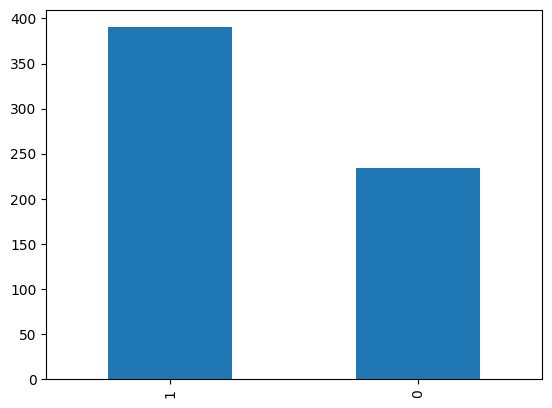

In [22]:
# Get unique values and their counts
unique_values, counts = np.unique(y_test, return_counts=True)

# Create a dictionary of counts
class_counts = dict(zip(unique_values, counts))

# Print the counts
print(f"Class distribution in y_test:")
for class_id, count in class_counts.items():
    class_name = 'normal' if class_id == 0 else 'pneumonia'
    print(f"Class {class_name} (label {class_id}): {count} samples")

# Alternative way using pandas
import pandas as pd
y_test_df = pd.Series(y_test)
print("\nUsing pandas:")
print(y_test_df.value_counts())
percentage_df = y_test_df.value_counts(normalize=True) * 100
print(percentage_df)
print(y_test_df.value_counts().plot(kind='bar'))


In [23]:
def test_model_and_evaluate(model):
    # Predict probabilities for the test set
    y_pred_prob = model.predict(x_test)
    print(f"Predicted probabilities shape: {y_pred_prob.shape}")

    # Convert probabilities to binary labels using a threshold of 0.5
    y_pred_classes = (y_pred_prob > 0.5).astype(int).flatten()

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Print a classification report (precision, recall, F1-score per class)
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)

    # Visualize the confusion matrix using seaborn heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Calculate per-class accuracy
    per_class_accuracy = np.diagonal(cm) / np.sum(cm, axis=1)

    print("Per-class Accuracy:")
    for i, accuracy in enumerate(per_class_accuracy):
        class_name = 'Normal' if i == 0 else 'Pneumonia'
        print(f"Class {class_name}: {accuracy:.4f}")

def print_accuracy_and_loss(history): 
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    # Plot training & validation loss values
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [24]:
import warnings
warnings.filterwarnings('ignore')

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicted probabilities shape: (624, 1)
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8208 - loss: 0.6206 
Predicted probabilities shape: (624, 1)
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8208 - loss: 0.6206 
Test Loss: 0.5816
Test Accuracy: 0.8269
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.56      0.71       234
           1       0.79      0.98      0.88       390

    accuracy                           0.83       624
   macro avg       0.87      0.77      0.79       624
weighted avg       0.85      0.83      0.81       624

Test Loss: 0.5816
Test Accuracy: 0.8269
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.56      0.71       234
           1       0.79      0.98      0.88       390

    accuracy                           0.83       624
   macro avg       0.

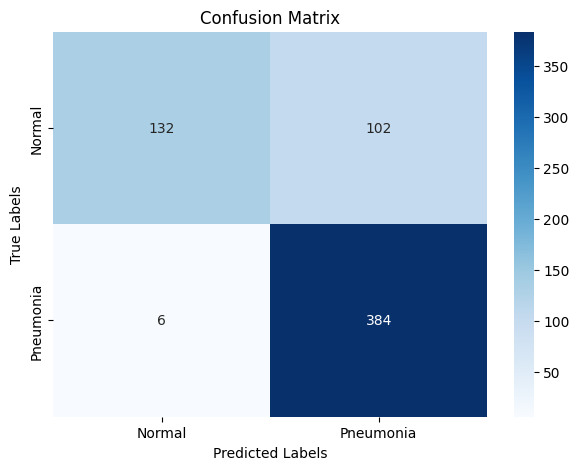

Per-class Accuracy:
Class Normal: 0.5641
Class Pneumonia: 0.9846


In [25]:
test_model_and_evaluate(model)

In [26]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │       138,255 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,087 (613.62 KB)

 Trainable params: 157,087 (613.62 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation))

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8032 - loss: 0.4330 - val_accuracy: 0.9256 - val_loss: 0.1946
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8032 - loss: 0.4330 - val_accuracy: 0.9256 - val_loss: 0.1946
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9294 - loss: 0.1816 - val_accuracy: 0.9427 - val_loss: 0.1457
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9294 - loss: 0.1816 - val_accuracy: 0.9427 - val_loss: 0.1457
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9360 - loss: 0.1595 - val_accuracy: 0.9504 - val_loss: 0.1327
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9360 - loss: 0.1595 - val_accuracy: 0.9504 - val_loss: 0.1327
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9478 - loss: 0.1429 - val_accuracy: 0.9561 - val_loss: 0.1180
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9478 - loss: 0.1429 - val_accuracy: 0.

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Predicted probabilities shape: (624, 1)
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8750 - loss: 0.6942Predicted probabilities shape: (624, 1)
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.6043 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.6043 
Test Loss: 0.5316
Test Accuracy: 0.8622
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.66      0.78       234
           1       0.83      0.98      0.90       390

    accuracy                           0.86       624
   macro avg       0.89      0.82      0.84       624
weighted avg       0.88      0.86      0.86       624

Test Loss: 0.5316
Test Accuracy: 0.8622
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.66      0.78       234
           1       0.83      0.98      0.90       390

    

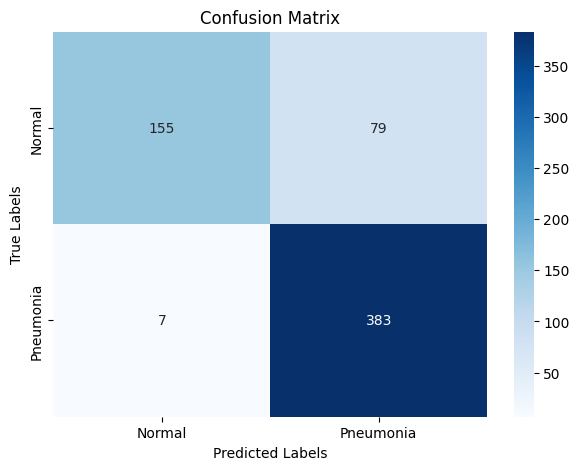

Per-class Accuracy:
Class Normal: 0.6624
Class Pneumonia: 0.9821


In [28]:
test_model_and_evaluate(model)

In [29]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 912,385 (3.48 MB)

 Trainable params: 912,385 (3.48 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation))

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7373 - loss: 0.5660 - val_accuracy: 0.8721 - val_loss: 0.4476
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7373 - loss: 0.5660 - val_accuracy: 0.8721 - val_loss: 0.4476
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8619 - loss: 0.3444 - val_accuracy: 0.8855 - val_loss: 0.2929
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8619 - loss: 0.3444 - val_accuracy: 0.8855 - val_loss: 0.2929
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8933 - loss: 0.2364 - val_accuracy: 0.9103 - val_loss: 0.2216
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8933 - loss: 0.2364 - val_accuracy: 0.9103 - val_loss: 0.2216
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9103 - loss: 0.2073 - val_accuracy: 0.8969 - val_loss: 0.2205
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9103 - loss: 0.2073 - val_accuracy: 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predicted probabilities shape: (624, 1)
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8438 - loss: 0.4313Predicted probabilities shape: (624, 1)
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8567 - loss: 0.3819
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8567 - loss: 0.3819
Test Loss: 0.3547
Test Accuracy: 0.8638
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       234
           1       0.87      0.91      0.89       390

    accuracy                           0.86       624
   macro avg       0.86      0.85      0.85       624
weighted avg       0.86      0.86      0.86       624

Test Loss: 0.3547
Test Accuracy: 0.8638
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       234
           1       0.87      0.91      0.89       390

    ac

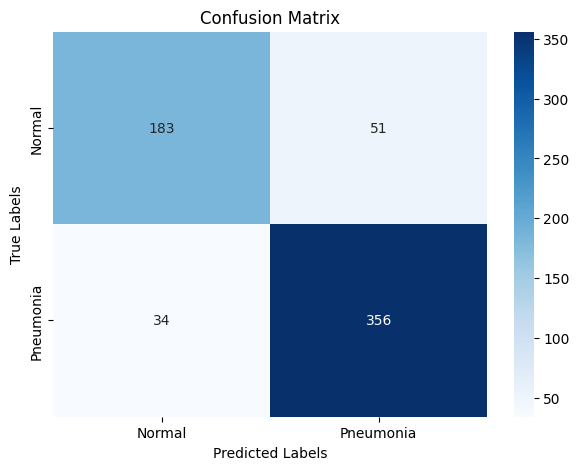

Per-class Accuracy:
Class Normal: 0.7821
Class Pneumonia: 0.9128


In [31]:
test_model_and_evaluate(model)

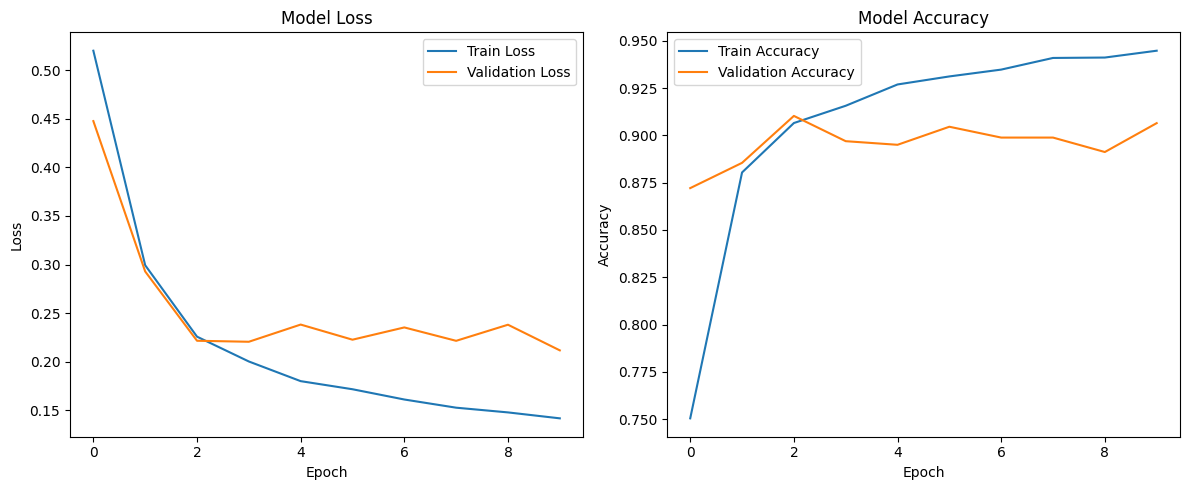

In [32]:
print_accuracy_and_loss(history)

In [33]:
#I'm still only performing at 80% accuracy on testing data with poor false positive performance. Update the CNN architecture to try and improve detection
#This model is not generalizing well to the validation set.

#To improve generalization to the validation set, you can try the following strategies:
#Regularization: Add L2 regularization to the dense layers to prevent overfitting.
#Data Augmentation: Apply transformations like rotation, flipping, and zooming to the training data to make the model robust.
#Learning Rate Adjustment: Use a learning rate scheduler to reduce the learning rate as training progresses.
#Early Stopping: Monitor validation loss and stop training when it stops improving.
#Batch Normalization: Add batch normalization layers after convolutional layers to stabilize training.
#Would you like me to implement these changes in the model?

#Yes, add a new experiment to try these

# Data Augmentation
image_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

augmented_train = image_gen.flow(x_train, y_train, batch_size=32)

# Model with Regularization and Batch Normalization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 913,281 (3.48 MB)

 Trainable params: 912,833 (3.48 MB)

 Non-trainable params: 448 (1.75 KB)

In [34]:
history = model.fit(
    augmented_train,
    epochs=40,
    validation_data=(x_validation, y_validation),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7891 - loss: 6.4540 - val_accuracy: 0.7424 - val_loss: 5.8729 - learning_rate: 1.0000e-04
Epoch 2/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7891 - loss: 6.4540 - val_accuracy: 0.7424 - val_loss: 5.8729 - learning_rate: 1.0000e-04
Epoch 2/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8726 - loss: 5.4822 - val_accuracy: 0.7424 - val_loss: 5.2859 - learning_rate: 1.0000e-04
Epoch 3/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8726 - loss: 5.4822 - val_accuracy: 0.7424 - val_loss: 5.2859 - learning_rate: 1.0000e-04
Epoch 3/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8857 - loss: 4.8503 - val_accuracy: 0.7863 - val_loss: 4.6709 - learning_rate: 1.0000e-04
Epoch 4/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8857 - loss: 4.8503 - val_accuracy: 0.7863 - val_loss: 4.6709 - learning_rate: 1.0000e-04
Epoch 4/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Predicted probabilities shape: (624, 1)
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9062 - loss: 0.5975Predicted probabilities shape: (624, 1)
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8616 - loss: 0.6263
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8616 - loss: 0.6263
Test Loss: 0.6203
Test Accuracy: 0.8574
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.65      0.77       234
           1       0.82      0.98      0.90       390

    accuracy                           0.86       624
   macro avg       0.89      0.81      0.83       624
weighted avg       0.87      0.86      0.85       624

Test Loss: 0.6203
Test Accuracy: 0.8574
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.65      0.77       234
           1       0.82      0.98      0.90       390

    ac

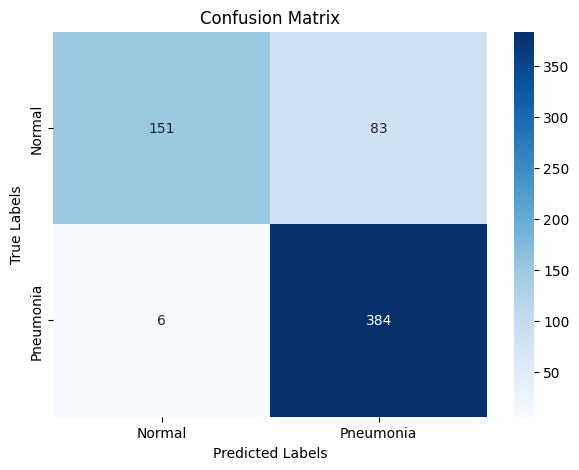

Per-class Accuracy:
Class Normal: 0.6453
Class Pneumonia: 0.9846


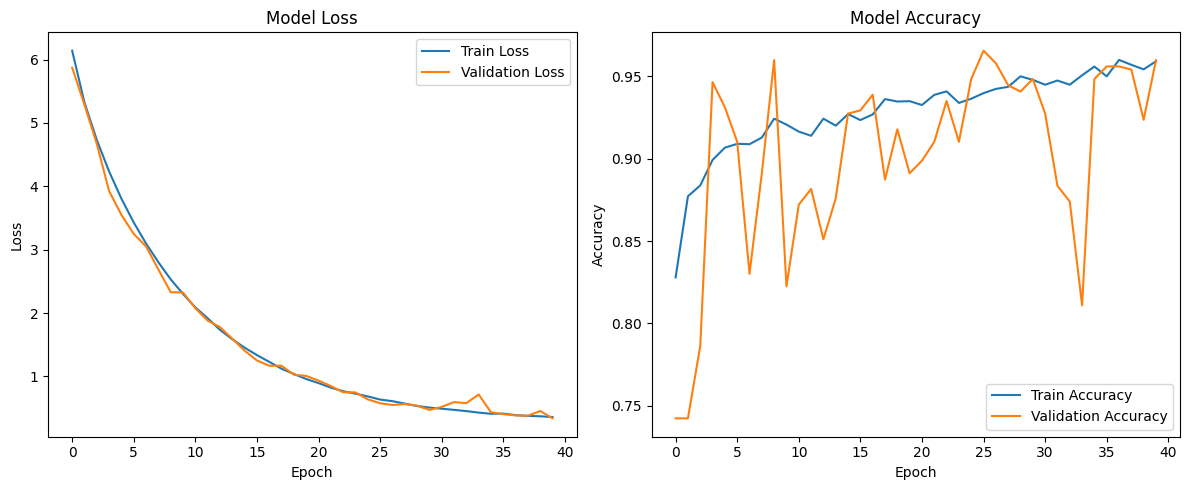

In [35]:
test_model_and_evaluate(model)
print_accuracy_and_loss(history)

In [36]:
# Model with Regularization and Batch Normalization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 913,281 (3.48 MB)

 Trainable params: 912,833 (3.48 MB)

 Non-trainable params: 448 (1.75 KB)

In [37]:
history = model.fit(
    x_train,
    y_train,
    epochs=40,
    validation_data=(x_validation, y_validation),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8626 - loss: 6.2151 - val_accuracy: 0.7424 - val_loss: 5.6790 - learning_rate: 1.0000e-04
Epoch 2/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8626 - loss: 6.2151 - val_accuracy: 0.7424 - val_loss: 5.6790 - learning_rate: 1.0000e-04
Epoch 2/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9370 - loss: 5.0393 - val_accuracy: 0.7424 - val_loss: 5.2081 - learning_rate: 1.0000e-04
Epoch 3/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9370 - loss: 5.0393 - val_accuracy: 0.7424 - val_loss: 5.2081 - learning_rate: 1.0000e-04
Epoch 3/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9402 - loss: 4.2911 - val_accuracy: 0.7844 - val_loss: 4.2301 - learning_rate: 1.0000e-04
Epoch 4/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9402 - loss: 4.2911 - val_accuracy: 0.7844 - val_loss: 4.2301 - learning_rate: 1.0000e-04
Epoch 4/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted probabilities shape: (624, 1)
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8750 - loss: 0.9254Predicted probabilities shape: (624, 1)
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8808 - loss: 0.7923
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8808 - loss: 0.7923
Test Loss: 0.7175Test Loss: 0.7175
Test Accuracy: 0.8910
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.83       234
           1       0.86      0.99      0.92       390

    accuracy                           0.89       624
   macro avg       0.92      0.86      0.88       624
weighted avg       0.90      0.89      0.89       624


Test Accuracy: 0.8910
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.83       234
           1       0.86      0.99      0.92       390

    ac

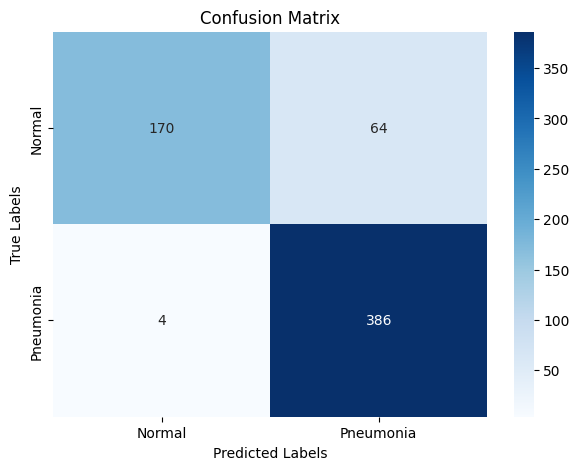

Per-class Accuracy:
Class Normal: 0.7265
Class Pneumonia: 0.9897


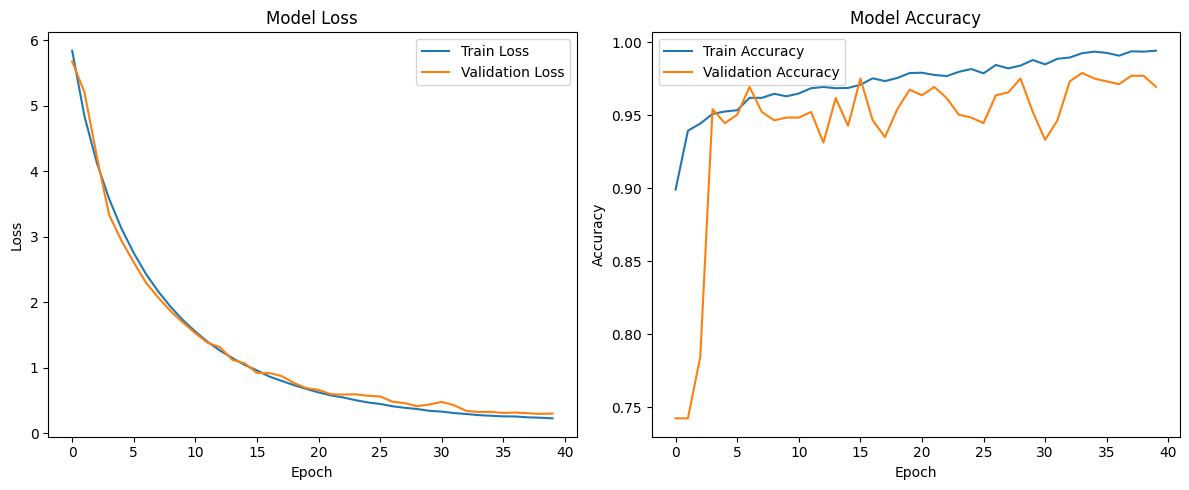

In [38]:
test_model_and_evaluate(model)
print_accuracy_and_loss(history)

In [39]:
# Debugging Class Distribution
print("Class distribution in training set:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
print(dict(zip(unique_train, counts_train)))
print("\nClass distribution in validation set:")
unique_val, counts_val = np.unique(y_validation, return_counts=True)
print(dict(zip(unique_val, counts_val)))
print("\nClass distribution in test set:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
print(dict(zip(unique_test, counts_test)))

# Debugging Normalization Consistency
print("\nMax pixel value in training set:", x_train.max())
print("Max pixel value in validation set:", x_validation.max())
print("Max pixel value in test set:", x_test.max())

# Debugging Predictions and Threshold
y_pred_prob = model.predict(x_test)
print("\nSample predicted probabilities:", y_pred_prob[:10])
y_pred_classes = (y_pred_prob > 0.5).astype(int).flatten()
print("Sample predicted classes:", y_pred_classes[:10])
print("Sample true labels:", y_test[:10])

# Debugging Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)

Class distribution in training set:
{np.int64(0): np.int64(1214), np.int64(1): np.int64(3494)}

Class distribution in validation set:
{np.int64(0): np.int64(135), np.int64(1): np.int64(389)}

Class distribution in test set:
{np.int64(0): np.int64(234), np.int64(1): np.int64(390)}

Max pixel value in training set: 1.0
Max pixel value in validation set: 1.0
Max pixel value in test set: 0.99607843
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Sample predicted probabilities: [[9.9999982e-01]
 [9.9760056e-01]
 [9.8101658e-01]
 [1.9064793e-05]
 [9.9999851e-01]
 [1.0000000e+00]
 [9.9999923e-01]
 [9.9999720e-01]
 [9.9997938e-01]
 [9.9911028e-01]]
Sample predicted classes: [1 1 1 0 1 1 1 1 1 1]
Sample true labels: [1 0 1 0 1 1 1 1 1 0]

Confusion Matrix:
[[170  64]
 [  4 386]]

Sample predicted probabilities: [[9.9999982e-01]
 [9.9760056e-01]
 [9.8101658e-01]
 [1.9064793e-05]
 [9.9999851e-01]
 [1.0000000e+00]
 [9.9999923e-01]
 [9.9999720e-01]
 [9.9997938e-01]
 [

Class weights: {0: np.float64(1.9390444810543657), 1: np.float64(0.6737263880938752)}
Epoch 1/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9916 - loss: 0.2372 - val_accuracy: 0.9771 - val_loss: 0.2873 - learning_rate: 5.0000e-05
Epoch 2/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9917 - loss: 0.2309 - val_accuracy: 0.9676 - val_loss: 0.3173 - learning_rate: 5.0000e-05
Epoch 3/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9903 - loss: 0.2314 - val_accuracy: 0.9599 - val_loss: 0.3323 - learning_rate: 5.0000e-05
Epoch 4/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9905 - loss: 0.2236 - val_accuracy: 0.9580 - val_loss: 0.3259 - learning_rate: 5.0000e-05
Epoch 5/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9911 - loss: 0.2154 - val_accuracy: 0.9580 - val_loss: 0.3416 - learning_rate: 2.5000e-05
Epoch 6/40
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9925 - loss: 0.2117 - val_accuracy: 0.9599 - val_loss: 0.3335 

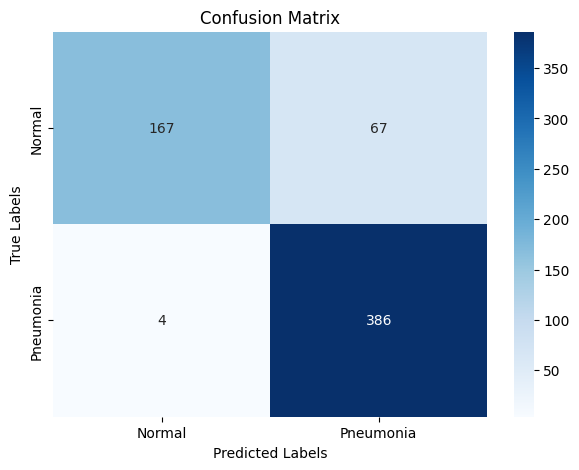

Per-class Accuracy:
Class Normal: 0.7137
Class Pneumonia: 0.9897


In [ ]:
# Add class weighting to address imbalance
class_weights = {
    0: len(y_train) / (2 * np.sum(y_train == 0)),
    1: len(y_train) / (2 * np.sum(y_train == 1))
}
print("Class weights:", class_weights)

# Retrain the model with class weights
history = model.fit(
    x_train,
    y_train,
    epochs=40,
    validation_data=(x_validation, y_validation),
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr]
 )

# Evaluate the model again
test_model_and_evaluate(model)